## Churn Prediction - Empresa de Telecomunicações

In [120]:
# Importar as Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler, SMOTEN
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.feature_selection import f_classif, SelectKBest, chi2


import warnings
warnings.filterwarnings('ignore')

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Base de Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na plataforma de ensino da IBM Developer e atualmente pode ser encontrado [neste link](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download) no Kaggle.

Conhecendo as variáveis do dataset:

* customerID - Código de identificação do consumidor;
* gender - Gênero do consumidor;
* SeniorCitizen -  Indica se o cliente tem 65 anos ou mais;
* Partner - Indica se o cliente é casado;
* tenure - Quantos meses a pessoa é cliente da empresa;
* PhoneService - Possui serviço telefônico;
* MultipleLines - Possui múltiplas linhas telefônicas;
* InternetService - Qual provedor de serviço de internet;
* OnlineSecurity - Possui serviço de segurança online;
* OnlineBackup - Possui serviço de backup online ativado;
* DeviceProtection - Cliente possui alguma proteção de sistema;
* TechSupport - Possui serviço de suporte técnico ativado;
* StreamingTV - Possui streaming de TV ativado;
* StreamingMovies - Possui serviço de streaming de filmes ativado;
* Contract - Tipo do contrato do consumidor;
* PaperlessBilling - Cliente utiliza faturamento sem papel;
* PaymentMethod - Método de pagamento;
* MonthlyCharges - Pagamento mensal atual;
* TotalCharges - Valor total que o cliente pagou pelos serviços durante todo o tempo;
* Churn - Cliente abandonou o serviço.

In [3]:
df = pd.read_csv('Telecom-Customer-Churn.csv')
print("O conjunto de dados contém {} linhas e {} colunas".format(df.shape[0], df.shape[1]))
df

O conjunto de dados contém 7043 linhas e 21 colunas


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
# Verificando dataset
df1 = df.drop(columns=['customerID', 'TotalCharges'])

check_dataset = pd.DataFrame({
    'type': df1.dtypes,
    'missing': df1.isna().sum(),
    'size': df1.shape[0],
    'unique': df1.nunique()
})
check_dataset['percentual'] = round(check_dataset['missing'] / check_dataset['size'], 2)
check_dataset

,type,missing,size,unique,percentual
gender,object,0,7043,2,0.00
SeniorCitizen,int64,0,7043,2,0.00
Partner,object,0,7043,2,0.00
Dependents,object,0,7043,2,0.00
tenure,int64,0,7043,73,0.00
PhoneService,object,0,7043,2,0.00
MultipleLines,object,0,7043,3,0.00
InternetService,object,0,7043,3,0.00
OnlineSecurity,object,0,7043,3,0.00
OnlineBackup,object,0,7043,3,0.00


Algumas observações sobre o dataset do estudo:

* A coluna customerID trata-se de um código de identificação dos clientes, por isso foi excluída do dataset.
* A variável alvo é a coluna Churn, ela indica se o cliente cancelou ou não o serviço.
* A coluna TotalCharges assim como a coluna MonthlyCharges, apresenta valores flutuantes, mas está como tipo string uma vez que seu tipo de dado deveria ser float.
* Ao tentar converter a coluna TotalCharges para tipo float apresentou um erro porque os dados ausentes foram preenchidos com " ". Foi criada uma função para lidar com o erro e em seguida uma imputação de valores utilizando a mediana.

### Análise Exploratória dos Dados (EDA)

Principais insights das variáveis categóricas em relação a variável que iremos prever (Churn):

* Clientes que não possuem dependentes e que não são casados tem maior probabilidade de abandonar os serviços;
* Como podemos observar, os cliente que não possuem internet tendem a permanecer mais tempo com a empresa;
* A qualidade do serviço deve ser considerada na estratégia de reter o cliente, pois podemos observar uma taxa de Churn considerável para os consumidores que possuem streaming e internet de fibra ótica.

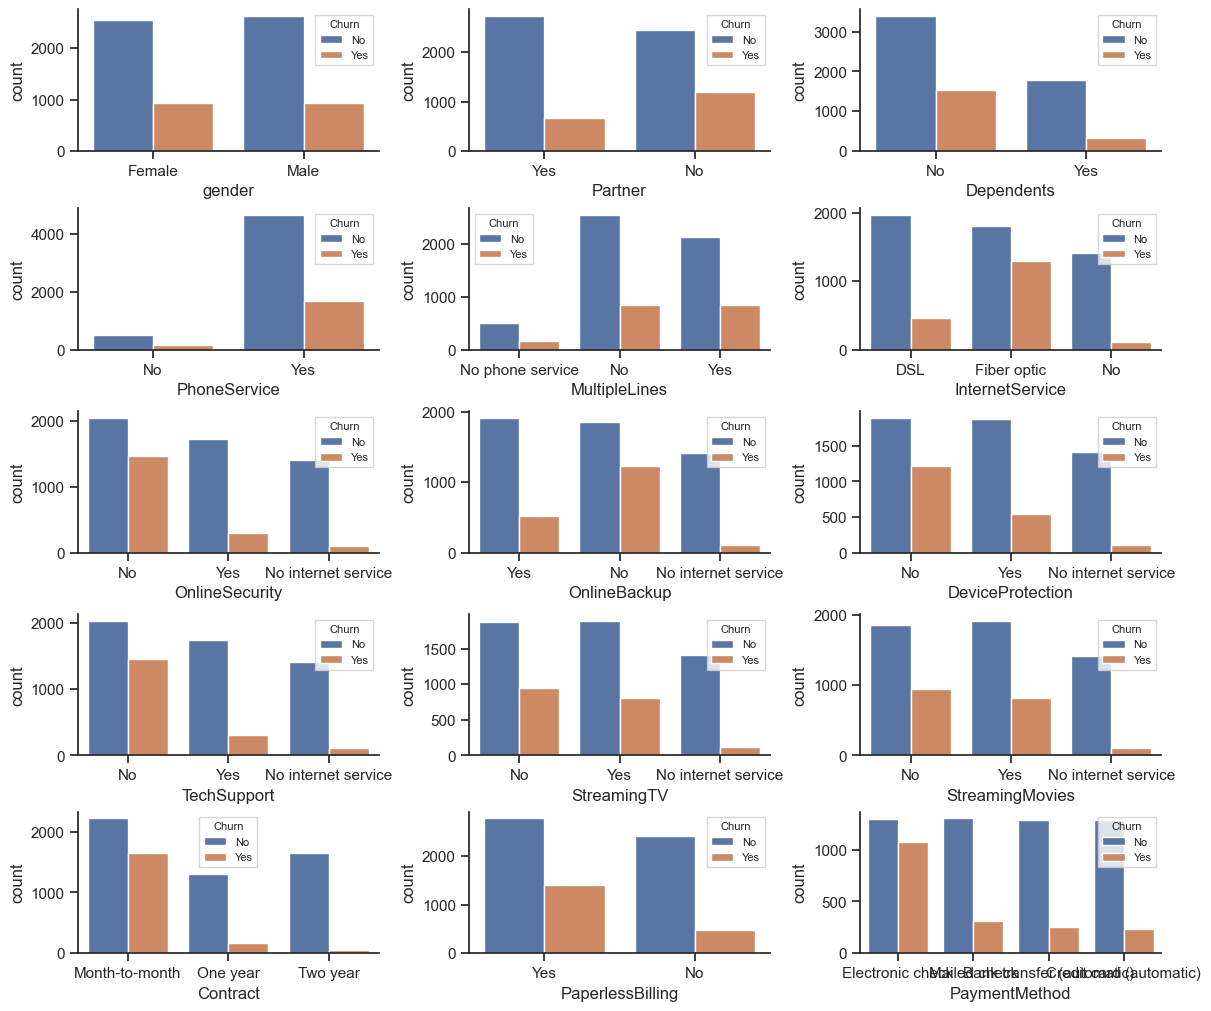

In [5]:
df2 = df1.copy()
df2 = df2.drop(columns=['Churn'])

df_columns = df2.select_dtypes(include='object').columns.tolist()

# Gráfico das variáveis categóricas
rc_params = {'axes.spines.top': False,
             'axes.spines.right': False,
             'legend.fontsize': 8,
             'legend.title_fontsize': 8,
             'legend.loc': 'upper right',
             'legend.fancybox': False,
             'axes.titleweight': 'bold',
             'axes.titlesize': 12,
             'axes.titlepad': 12}
sns.set_theme(style='ticks', rc=rc_params)
sns.set_color_codes('muted')

num_plots = len(df_columns)
total_cols = 3
total_rows = (num_plots + total_cols - 1) // total_cols
fig1, axs = plt.subplots(nrows=total_rows, ncols=total_cols, figsize=(12, 10), constrained_layout=True)

for i, col in enumerate(df_columns):
    row = i // total_cols
    pos = i % total_cols
    sns.countplot(x=col, data=df1, hue='Churn', ax=axs[row][pos])
    axs[row][pos].set_xticklabels(axs[row][pos].get_xticklabels())

plt.show()

**Contratos**

A maioria dos contratos é do tipo Month-to-month, esses clientes tendem cancelar mais os serviços. Dessa forma, a empresa precisa pensar em uma forma de reter esses clientes com um contrato maior e com melhores serviços de internet, visto que, os clientes que mais abandonam a empresa são os que possuem internet.

In [6]:
# Porcentagem dos Contratos
contratos = (df[df.Contract == 'Month-to-month'].shape[0] / df.shape[0]) * 100

# Porcentagem dos Contratos Month-to-Month dos clientes churn
contratos_churn = (df[(df.Churn == 'Yes') & (df.Contract == 'Month-to-month')].shape[0] / df[df.Churn == 'Yes'].shape[0]) * 100

# Porcentagem dos Contratos Month-to-Month dos clientes no churn
contratos_nochurn = (df[(df.Churn == 'No') & (df.Contract == 'Month-to-month')].shape[0] / df[df.Churn == 'No'].shape[0]) * 100

print('Porcentagem de contratos mensais: {:.2f}%'.format(contratos))
print('Porcentagem de contratos mensais de clientes que não cancelaram: {:.2f}%'.format(contratos_nochurn))
print('Porcentagem de contratos mensais de clientes que cancelaram: {:.2f}%'.format(contratos_churn))

Porcentagem de contratos mensais: 55.02%
Porcentagem de contratos mensais de clientes que não cancelaram: 42.91%
Porcentagem de contratos mensais de clientes que cancelaram: 88.55%


**Churn**

É perceptível a diferença entre as classes No e Yes da variável Churn. Para obter os melhores resultados com o modelo de Machine Learning , é preciso fazer o balanceamento das classes.

Porcentagem de Churn é **26.54%** no dataset.

Conforme o gráfico abaixo, os dados relacionados com a variável alvo Churn está desbalanceada, onde apenas 26,54% dos dados totais estão relacionados com os clientes que cancelaram o serviço.

No     5174
Yes    1869
Name: Churn, dtype: int64

Porcentagem de Churn 26.54% no dataset.



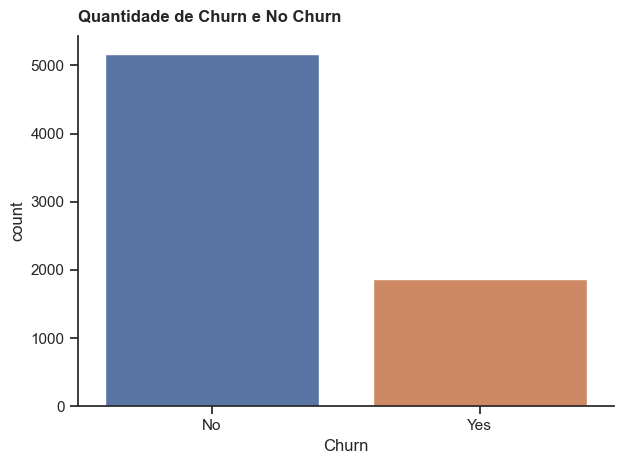

In [7]:
# Quantidade de Churn e No Churn
print(df.Churn.value_counts())
print('\nPorcentagem de Churn {:.2f}% no dataset.\n'.format((df[df.Churn == "Yes"].shape[0] / df.shape[0]) * 100))

sns.countplot(x=df.Churn)
plt.title('Quantidade de Churn e No Churn', fontsize=12, loc='left', pad=10)
plt.tight_layout()
plt.show()

Comparação dos tipos de contrato

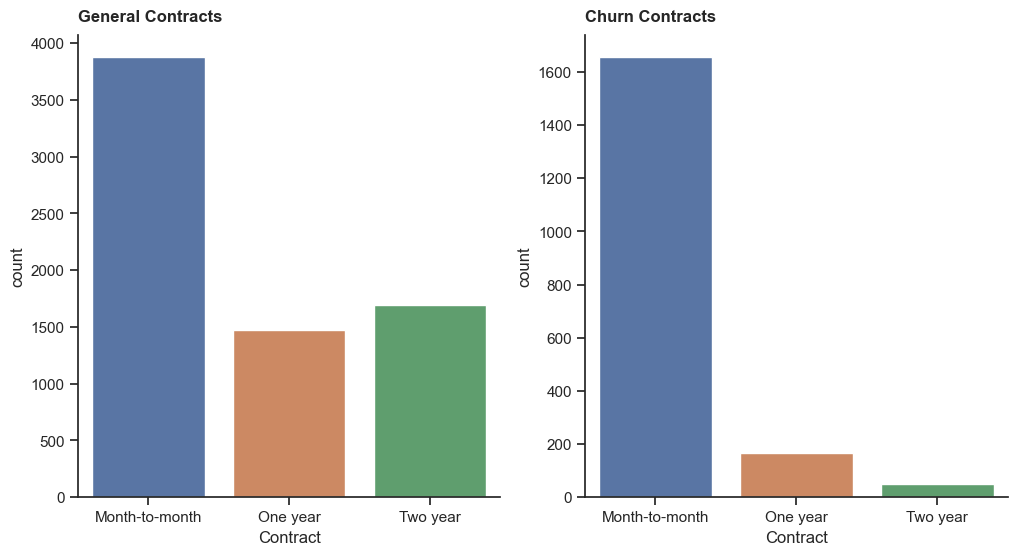

In [8]:
df_churn = df[df.Churn == 'Yes']
df_nochurn = df[df.Churn == 'No']

fig3, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(x='Contract', data=df, ax=ax[0])
ax[0].set_title('General Contracts', fontsize=12, loc='left', pad=10)

sns.countplot(x='Contract', data=df_churn, order=['Month-to-month', 'One year', 'Two year'], ax=ax[1])
ax[1].set_title('Churn Contracts', fontsize=12, loc='left', pad=10)

plt.show()

In [39]:
# Limpeza dos Dados
df3 = df.copy()
df3.drop('customerID', axis=1, inplace=True)

# Convertendo a coluna TotalCharges para float
def converter_str_float(column):
    try:
        return float(column)
    except ValueError:
        return np.nan

df3['TotalCharges'] = df3['TotalCharges'].apply(converter_str_float)
print('Total Charges nan values: {}'.format(df3['TotalCharges'].isnull().sum()))

# Alterando os valores nulos com a Mediana
df3["TotalCharges"].fillna(df3.TotalCharges.median(), inplace=True)

Total Charges nan values: 11


Com base no histograma abaixo é possível entender que:

* As variáveis TotalCharges e tenure estão relacionadas indiretamente, ou seja, quanto mais tempo de permanência na operadora maior a taxa de retenção do cliente;
* Quanto maior o preço da mensalidade do serviço, maior a chance de perder o cliente.

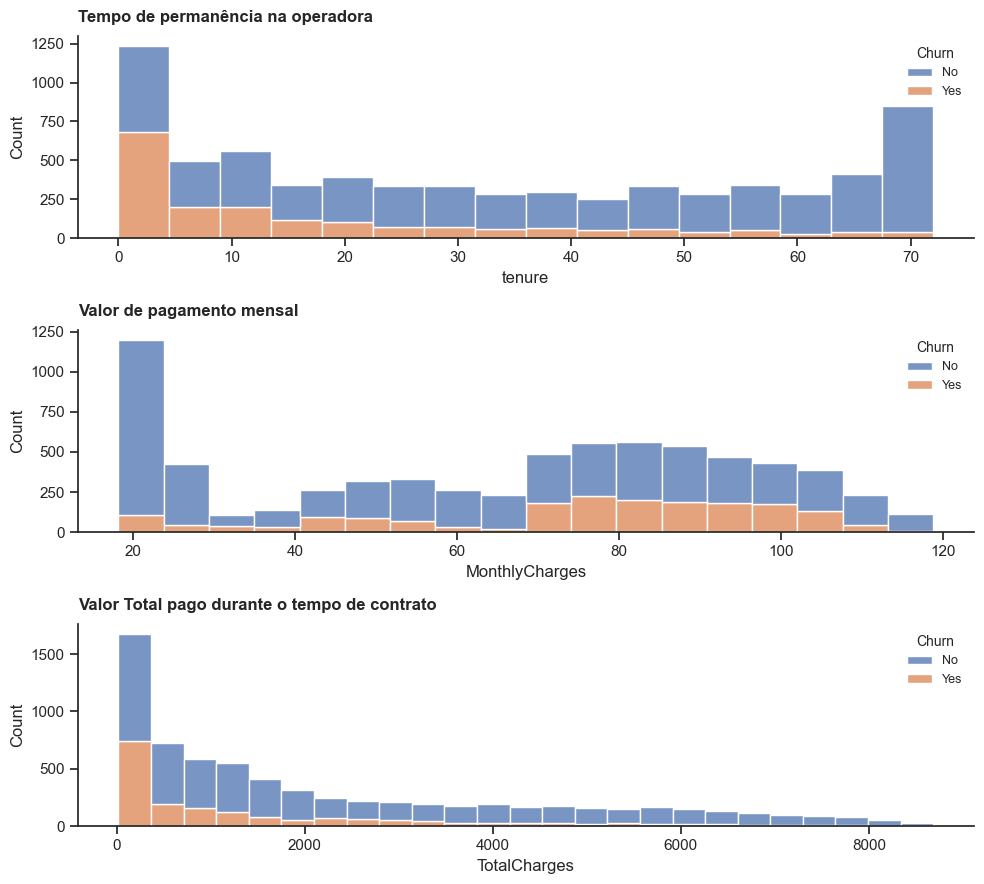

In [29]:
# Histograma das variáveis
custom_params = {'axes.spines.right': False,
                 'axes.spines.top': False,
                 'legend.fontsize': 9,
                 'legend.title_fontsize': 10,
                 'legend.loc': 'upper right'}
sns.set_theme(style='ticks', rc=custom_params)
sns.set_color_codes('muted')

fig2, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 9), constrained_layout=True)

sns.histplot(data=df3, x='tenure', hue='Churn', multiple='stack', ax=ax[0])
ax[0].set_title('Tempo de permanência na operadora', fontsize=12, loc='left', pad=10)

sns.histplot(data=df3, x='MonthlyCharges', hue='Churn', multiple='stack', ax=ax[1])
ax[1].set_title('Valor de pagamento mensal', fontsize=12, loc='left', pad=10)

sns.histplot(data=df3, x='TotalCharges', hue='Churn', multiple='stack', ax=ax[2])
ax[2].set_title('Valor Total pago durante o tempo de contrato', fontsize=12, loc='left', pad=10)

plt.tight_layout()
plt.show()

### Estatistica descritiva
Conforme método describe abaixo é possível notar que não há presença de outliers.

In [30]:
df3.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76,2281.92
std,0.37,24.56,30.09,2265.27
min,0.00,0.00,18.25,18.80
25%,0.00,9.00,35.50,402.23
50%,0.00,29.00,70.35,1397.47
75%,0.00,55.00,89.85,3786.60
max,1.00,72.00,118.75,8684.80


Assim como, nos gráficos de boxplot.

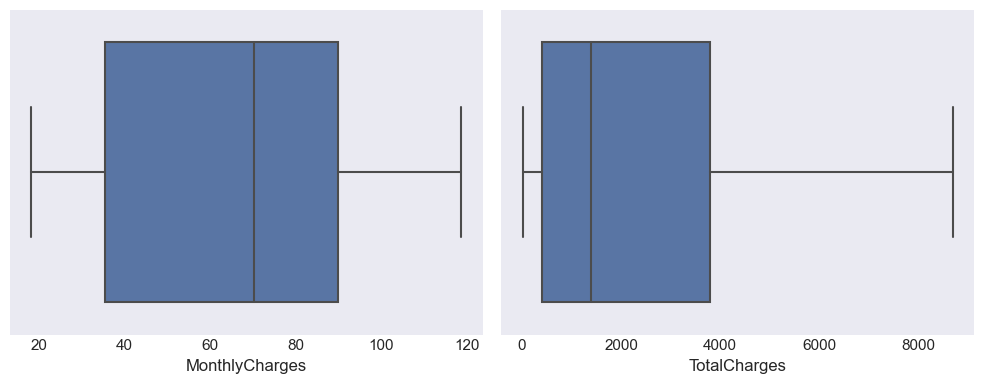

In [31]:
# Plotar gráficos boxplot para verificar a presença de outliers
plt.style.use('seaborn-dark')
fig4, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), constrained_layout=True)

sns.boxplot(x=df3['MonthlyCharges'], ax=ax[0])
sns.boxplot(x=df3['TotalCharges'], ax=ax[1])

plt.tight_layout()
plt.show()

### Pré-Processamento dos dados

Nesta etapa é necessário fazer um pré-processamento dos dados. O primeiro passo é transformar as variáveis categóricas em valores numéricos. Para isso, será utilizado o LabelEncoder para transformar as variáveis binárias em valores de 0 e 1.

Em seguida, as variáveis categóricas serão tratadas com o getDummies, que faz a transformação de forma direta das variáveis categóricas, assim poderão ser utilizadas em todos os modelos.

In [32]:
# Aplicando o LabelEncoder no dataframe para variáveis categoricas
le = LabelEncoder()

df4 = df3.copy()
text_data_features = [i for i in list(df4.columns) if i not in list(df4.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df4[i] = le.fit_transform(df4[i])
    print(i,' : ', df4[i].unique(),' = ', le.inverse_transform(df4[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


Data Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df4['tenure'] = mms.fit_transform(df4[['tenure']])
df4['MonthlyCharges'] = mms.fit_transform(df4[['MonthlyCharges']])
df4['TotalCharges'] = mms.fit_transform(df4[['TotalCharges']])
df4.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.01,0,1,0,0,2,0,0,0,0,0,1,2,0.12,0.00,0
1,1,0,0,0,0.47,1,0,0,2,0,2,0,0,0,1,0,3,0.39,0.22,0
2,1,0,0,0,0.03,1,0,0,2,2,0,0,0,0,0,1,3,0.35,0.01,1
3,1,0,0,0,0.62,0,1,0,2,0,2,2,0,0,1,0,0,0.24,0.21,0
4,0,0,0,0,0.03,1,0,1,0,0,0,0,0,0,0,1,2,0.52,0.02,1


Matriz de Correlação

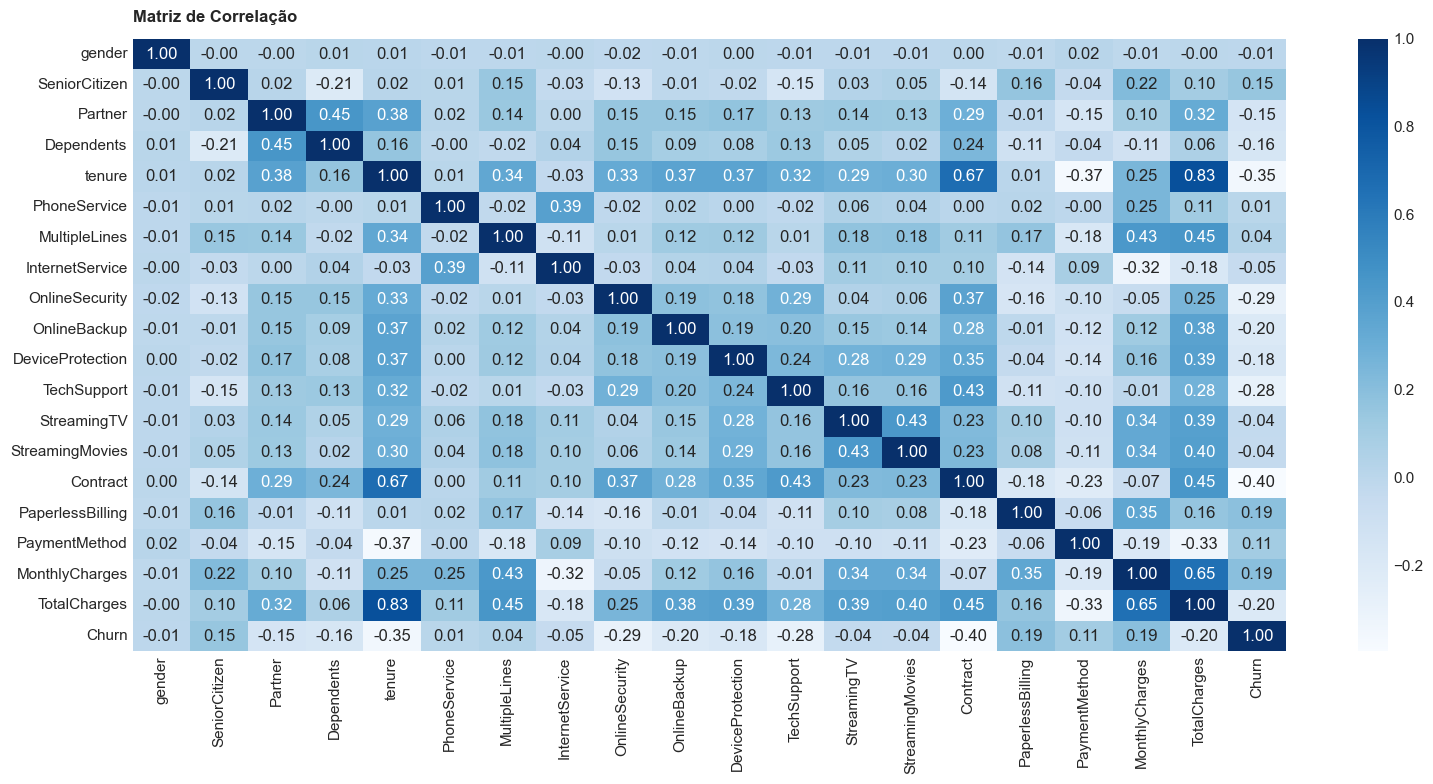

In [41]:
# Gráfico de Correlação

plt.figure(figsize = (16, 8))
sns.heatmap(df4.corr(), cmap='Blues', annot=True, fmt="1.2f")
plt.title('Matriz de Correlação', fontsize=12, loc='left', pad=12)
plt.tight_layout()
plt.show()

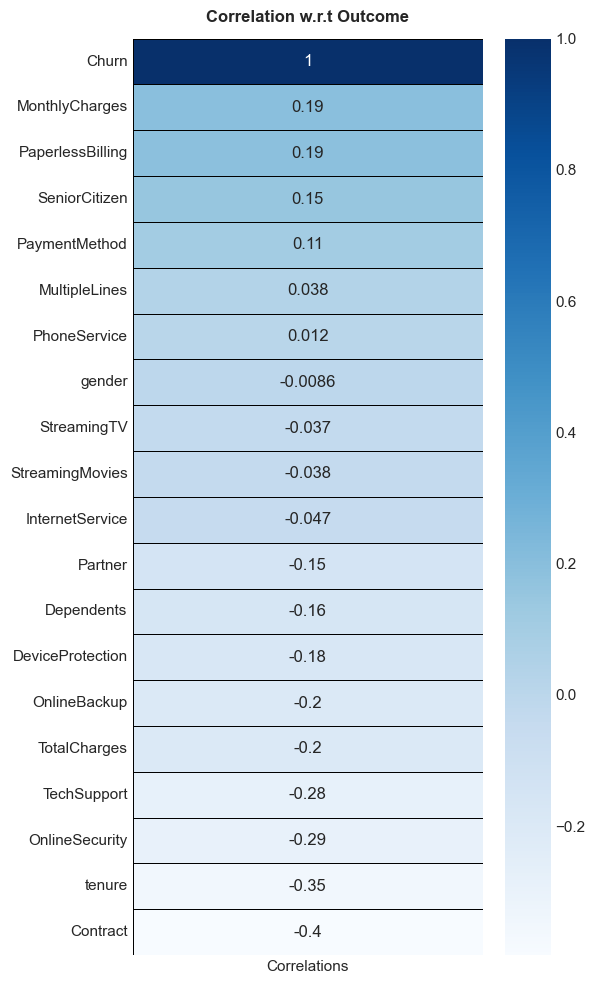

In [42]:
corr = df4.corrwith(df4['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']

plt.subplots(figsize = (6,10))
sns.heatmap(corr,annot = True, cmap = 'Blues', linewidths = 0.4,linecolor = 'black')
plt.title('Correlation w.r.t Outcome')
plt.tight_layout()
plt.show()

* MultipleLines, PhoneService, gender, StreamingTV, StreamingMovies e InternetService não apresentam nenhum tipo de correlação. Foi eliminado os recursos com coeficiente de correlação entre (-0,1,0,1).

### Feature Selection for Categorical Features 

Teste Chi-Squared

In [44]:
col = list(df4.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df4[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

categorical_features.remove('Churn')

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


Text(0.5, 1.0, 'Selection of Categorical Features')

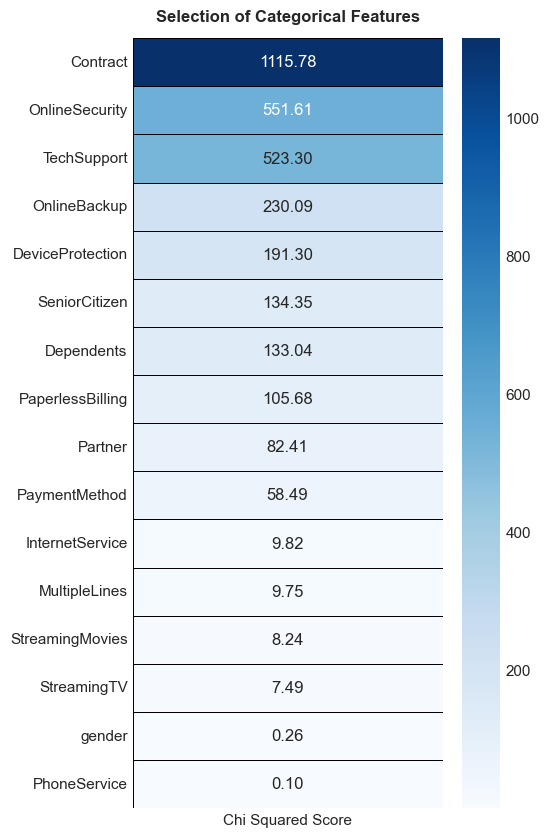

In [45]:
features = df4.loc[:,categorical_features]
target = df4.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_, index = list(features.columns), columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,10))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'Chi Squared Score'),annot = True,cmap = 'Blues', linewidths = 0.4,linecolor = 'black',fmt = '.2f')
plt.title('Selection of Categorical Features')

PhoneService, gender, StreamingTV, StreamingMovies, MultipleLines e InternetService correlação muito baixa com Churn.

 Teste ANOVA

Text(0.5, 1.0, 'Selection of Numerical Features')

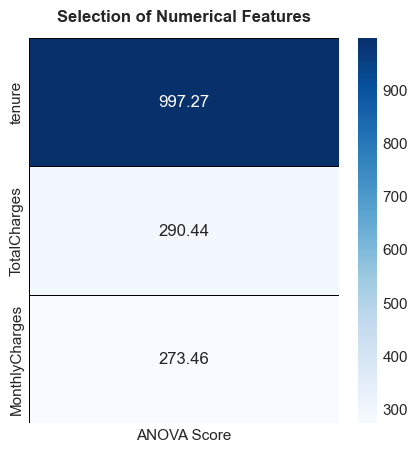

In [47]:
features = df4.loc[:, numerical_features]
target = df4.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif, k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'ANOVA Score'), annot = True,cmap = 'Blues', linewidths = 0.4, linecolor = 'black',fmt = '.2f')
plt.title('Selection of Numerical Features')

* De acordo com o teste ANOVA, quanto maior o valor da pontuação ANOVA, maior a importância do recurso.
* A partir dos resultados acima, precisamos incluir todos os recursos numéricos para modelagem.

In [49]:
#Exclusaão das varáveis que apresentam baixa correlação
df5 = df4.drop(columns = ['PhoneService', 'gender', 'MultipleLines', 'StreamingTV', 'StreamingMovies', 'InternetService'])
df5.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.01,0,2,0,0,0,1,2,0.12,0.00,0
1,0,0,0,0.47,2,0,2,0,1,0,3,0.39,0.22,0
2,0,0,0,0.03,2,2,0,0,0,1,3,0.35,0.01,1
3,0,0,0,0.62,2,0,2,2,1,0,0,0.24,0.21,0
4,0,0,0,0.03,0,0,0,0,0,1,2,0.52,0.02,1


### Treinamento do modelo

In [127]:
# Definindo os classificadores
classifiers = {
    'SVC': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(objective='binary:hinge', random_state=42),
    'LightGBM': LGBMClassifier(objective='binary', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [128]:
# Separar dados entre Treino e Teste
X = df5.drop('Churn', axis=1)
y = df5['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [129]:
# Função para balanceamento dos dados
def balance_data_binary(X_train, y_train, method='SMOTE'):
    if method == 'SMOTE':
        smote = SMOTE(random_state=42)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
    elif method == 'ADASYN':
        adasyn = ADASYN(random_state=42)
        X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train, y_train)
    elif method == 'BorderlineSMOTE':
        blsmote = BorderlineSMOTE(random_state=42)
        X_train_balanced, y_train_balanced = blsmote.fit_resample(X_train, y_train)
    elif method == 'SMOTEN':
        smoten = SMOTEN(random_state=42)
        X_train_balanced, y_train_balanced = smoten.fit_resample(X_train, y_train)
    elif method == 'RandomOverSampler':
        rdsampler = RandomOverSampler(random_state=42)
        X_train_balanced, y_train_balanced = rdsampler.fit_resample(X_train, y_train)
    elif method == 'RandomUnderSampler':
        rus = RandomUnderSampler(random_state=42)
        X_train_balanced, y_train_balanced = rus.fit_resample(X_train, y_train)
    else:
        X_train_balanced, y_train_balanced = X_train, y_train
        
    return X_train_balanced, y_train_balanced

In [130]:
# Balanceando os dados de treinamento
X_train_balanced, y_train_balanced = balance_data_binary(X_train, y_train, method='SMOTEN')

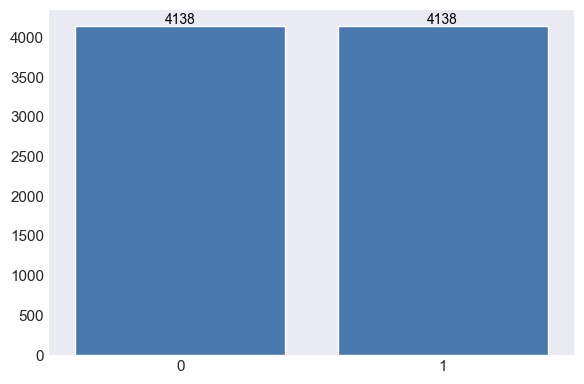

In [131]:
# Verificando o balanceamento dos dados após o balanceamento
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x=y_train_balanced, color = sns.xkcd_rgb['windows blue'])
#plt.title('Distribuição das classes (Após o balanceamento)', fontsize=12, loc='left', pad=12)
for i in ax.patches:
    h = i.get_height()
    ax.annotate('{:.0f}'.format(h),
                  (i.get_x() + i.get_width()/2, h),
                  ha='center',
                  va='baseline',
                  fontsize=10,
                  color='black',
                  xytext=(0, 2),
                  textcoords='offset points')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [132]:
# Função para treinar os modelos
def train_models_binary(classifiers, X_train, y_train):
    trained_models_binary = {}
    
    for clf_name, clf in classifiers.items():
        pipeline = make_pipeline(RobustScaler(), clf)
        pipeline.fit(X_train, y_train)
        trained_models_binary[clf_name] = pipeline
    
    return trained_models_binary

In [133]:
# Treinando os modelos finais com todos os dados de treinamento usando todos os classificadores
trained_models_binary = train_models_binary(classifiers, X_train_balanced, y_train_balanced)

In [134]:
# Criando uma tabela com os modelos treinados e os resultados no conjunto de teste
results_df_binary = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC'])

for clf_name, model in trained_models_binary.items():
    y_pred = model.predict(X_test)
    clf_report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    results_df_binary = results_df_binary.append({
        'Model': clf_name,                  
        'Accuracy': clf_report['accuracy'],
        'Precision': clf_report['macro avg']['precision'],
        'Recall': clf_report['macro avg']['recall'],
        'F1-score': clf_report['macro avg']['f1-score'],
        'ROC-AUC': roc_auc
    }, ignore_index=True)
    
print("\nResults on Test Set:")
print(results_df_binary)


Results on Test Set:
                 Model  Accuracy  Precision  Recall  F1-score  ROC-AUC
0                  SVC      0.75       0.71    0.76      0.72     0.76
1  Logistic Regression      0.74       0.71    0.76      0.71     0.76
2        Random Forest      0.78       0.71    0.71      0.71     0.71
3              XGBoost      0.76       0.70    0.71      0.71     0.71
4             LightGBM      0.79       0.73    0.75      0.74     0.75
5    Gradient Boosting      0.77       0.72    0.77      0.73     0.77


--- SVC ---
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1036
           1       0.51      0.79      0.62       373

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



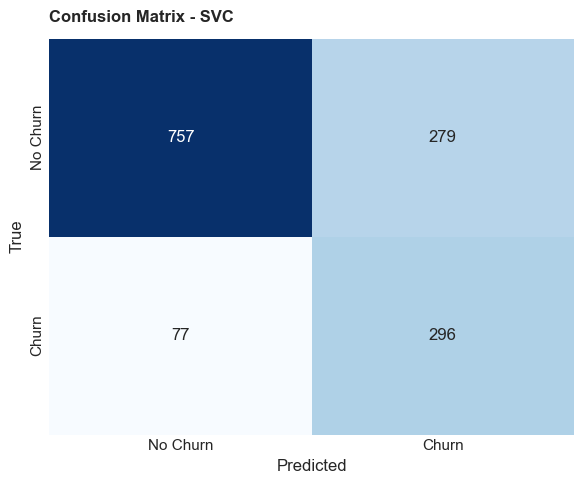


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1036
           1       0.50      0.82      0.62       373

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.81      0.74      0.75      1409



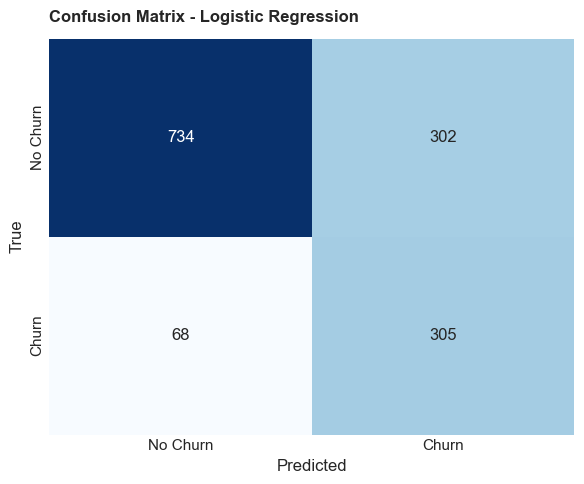


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1036
           1       0.58      0.55      0.57       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.78      0.78      1409



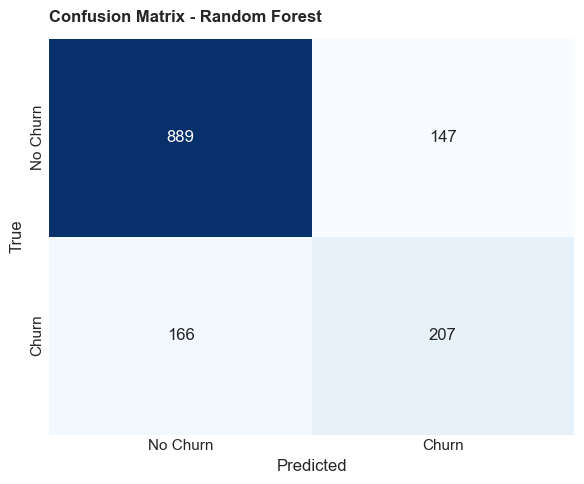


--- XGBoost ---
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1036
           1       0.55      0.61      0.58       373

    accuracy                           0.76      1409
   macro avg       0.70      0.71      0.71      1409
weighted avg       0.77      0.76      0.77      1409



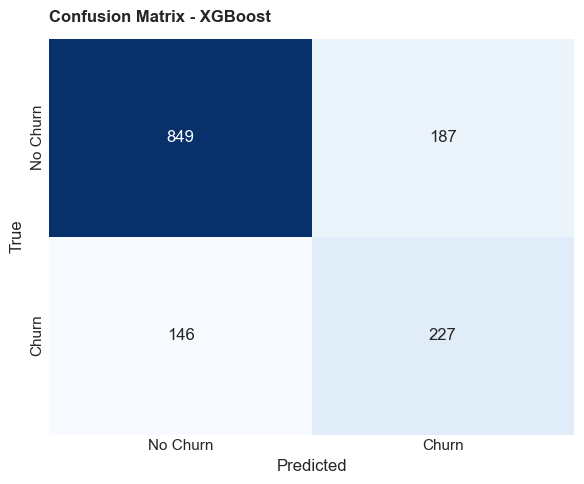


--- LightGBM ---
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1036
           1       0.58      0.67      0.62       373

    accuracy                           0.79      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.80      0.79      0.79      1409



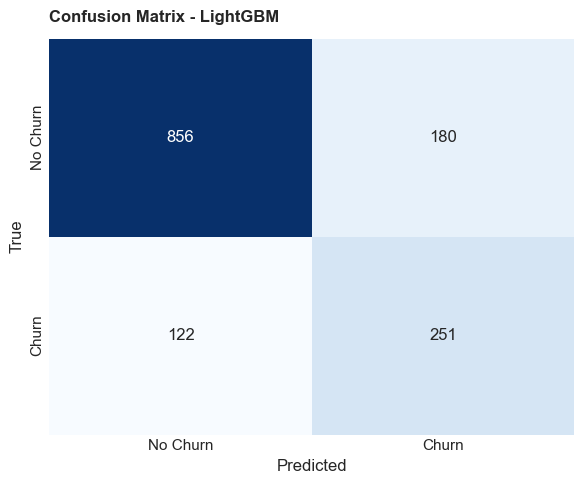


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1036
           1       0.55      0.75      0.64       373

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.77      0.78      1409



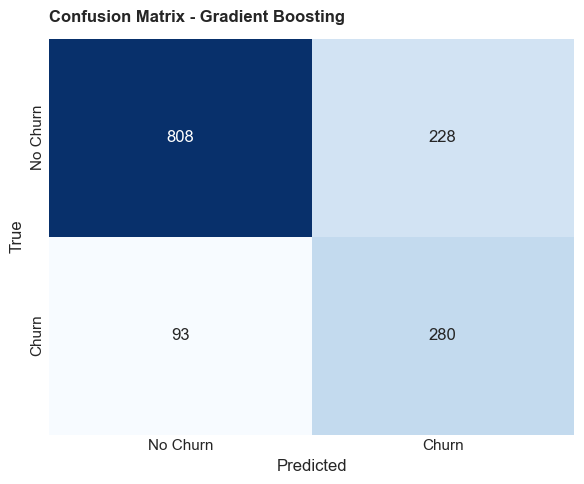

In [135]:
# Avaliando o desempenho dos modelos finais no conjunto de teste
for clf_name, model in trained_models_binary.items():
    print('---', clf_name, '---')
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    # Calculando e exibindo a matriz de confusão como um gráfico
    cm = confusion_matrix(y_test, y_pred)
    f, ax = plt.subplots(figsize=(6, 5))
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {clf_name}', fontsize=12, loc='left', pad=12)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.xaxis.set_ticklabels(['No Churn', 'Churn'])  
    ax.yaxis.set_ticklabels(['No Churn', 'Churn'])
    plt.tight_layout()
    plt.show()
    print()

### Hiperparametros

A fim de obter resultados mais consistentes foi realizado um processo de otimização de hiperparâmetros utilizando o algoritmo **GridSearchCV** do **Scikit-Learn**, que visa escolher o melhor conjunto de hiperparâmetros a partir de uma validação cruzada.

In [136]:
# Definindo os hiperparâmetros para ajuste - Classificação Binária
param_grid = {
    'SVC': {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']},
    'Logistic Regression': {'logisticregression__C': [0.1, 1, 10], 'logisticregression__solver': ['liblinear', 'saga'], 'logisticregression__max_iter': [100, 500, 1000]},
    'Random Forest': {'randomforestclassifier__n_estimators': [50, 500, 1000], 'randomforestclassifier__max_depth': [5, 100, 1000], 'randomforestclassifier__max_leaf_nodes': [8, 16, 24]},
    'XGBoost': {'xgbclassifier__learning_rate': [0.1, 0.15, 0.20], 'xgbclassifier__n_estimators': [100, 500, 1000]},
    'LightGBM': {'lgbmclassifier__learning_rate': [0.1, 0.10, 0.20], 'lgbmclassifier__n_estimators': [100, 500, 1000], 'lgbmclassifier__max_depth': [5, 10, 15], 'lgbmclassifier__min_child_samples': [10, 20, 30], 'lgbmclassifier__num_leaves': [31, 63, 127]},
    'Gradient Boosting': {'gradientboostingclassifier__learning_rate': [0.1, 0.10, 0.20], 'gradientboostingclassifier__n_estimators': [100, 200, 1000]}
}

In [137]:
# Função para treinar os hiperparâmetros
def train_hyperparameters(classifiers, X_train, y_train, param_grid):
    trained_hyper = {}
    best_params = {}
    
    for clf_name, clf in classifiers.items():
        pipeline = make_pipeline(RobustScaler(), clf)

        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        grid_search = GridSearchCV(pipeline, param_grid=param_grid[clf_name], scoring='recall', cv=kfold, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        best_estimator = grid_search.best_estimator_
        best_params[clf_name] = grid_search.best_params_
        
        trained_hyper[clf_name] = best_estimator
    
    return trained_hyper, best_params

In [138]:
# Treinando os modelos com os melhores hiperparâmetros usando GridSearchCV
trained_hyper, best_params = train_hyperparameters(classifiers, X_train_balanced, y_train_balanced, param_grid)

In [139]:
# Exibindo os melhores hiperparâmetros encontrados
print("\nBest Hyperparameters:")
for clf_name, params in best_params.items():
    print(f"{clf_name}: {params}")


Best Hyperparameters:
SVC: {'svc__C': 10, 'svc__kernel': 'rbf'}
Logistic Regression: {'logisticregression__C': 0.1, 'logisticregression__max_iter': 100, 'logisticregression__solver': 'saga'}
Random Forest: {'randomforestclassifier__max_depth': 100, 'randomforestclassifier__max_leaf_nodes': 24, 'randomforestclassifier__n_estimators': 1000}
XGBoost: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__n_estimators': 100}
LightGBM: {'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__max_depth': 15, 'lgbmclassifier__min_child_samples': 20, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__num_leaves': 63}
Gradient Boosting: {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__n_estimators': 1000}


In [140]:
# Criando uma tabela com os modelos treinados e os resultados no conjunto de teste
results_hy_binary = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC'])

for clf_name, model in trained_hyper.items():
    y_pred = model.predict(X_test)
    clf_report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    results_hy_binary = results_hy_binary.append({
        'Model': clf_name,
        'Accuracy': clf_report['accuracy'],
        'Precision': clf_report['macro avg']['precision'],
        'Recall': clf_report['macro avg']['recall'],
        'F1-score': clf_report['macro avg']['f1-score'],
        'ROC-AUC': roc_auc
    }, ignore_index=True)

print("\nResults on Test Set:")
print(results_hy_binary)


Results on Test Set:
                 Model  Accuracy  Precision  Recall  F1-score  ROC-AUC
0                  SVC      0.75       0.71    0.75      0.71     0.75
1  Logistic Regression      0.74       0.71    0.76      0.71     0.76
2        Random Forest      0.77       0.72    0.76      0.73     0.76
3              XGBoost      0.77       0.71    0.75      0.72     0.75
4             LightGBM      0.79       0.73    0.74      0.73     0.74
5    Gradient Boosting      0.77       0.70    0.72      0.71     0.72


--- SVC ---


              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1036
           1       0.52      0.74      0.61       373

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.79      0.75      0.76      1409




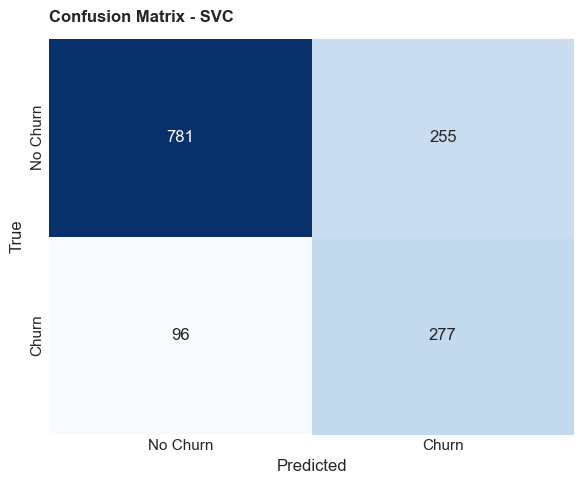


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1036
           1       0.50      0.82      0.62       373

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.81      0.74      0.75      1409




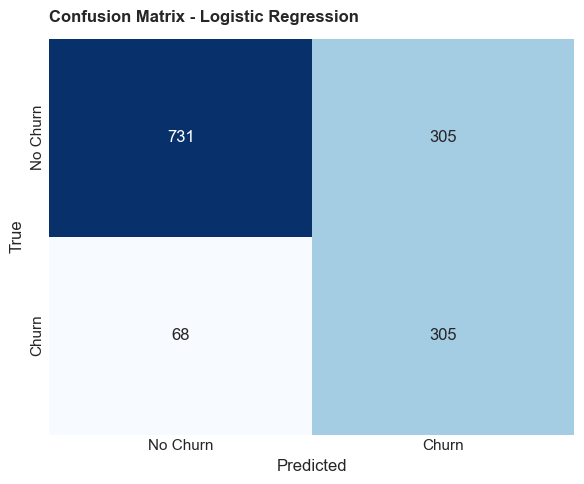


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1036
           1       0.54      0.74      0.63       373

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.77      1409




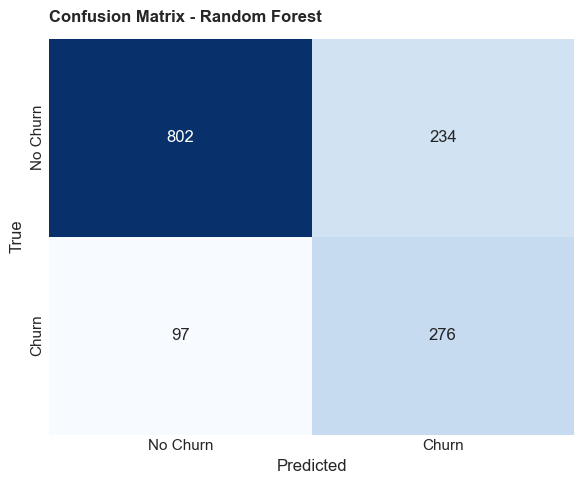


--- XGBoost ---
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1036
           1       0.54      0.72      0.62       373

    accuracy                           0.77      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.77      0.77      1409




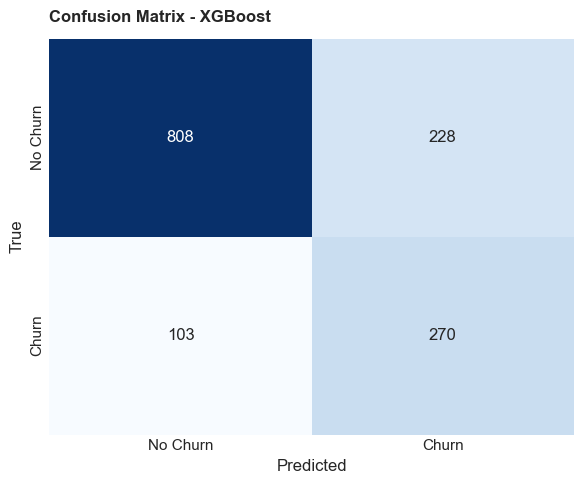


--- LightGBM ---
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1036
           1       0.59      0.64      0.61       373

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.79      0.79      0.79      1409




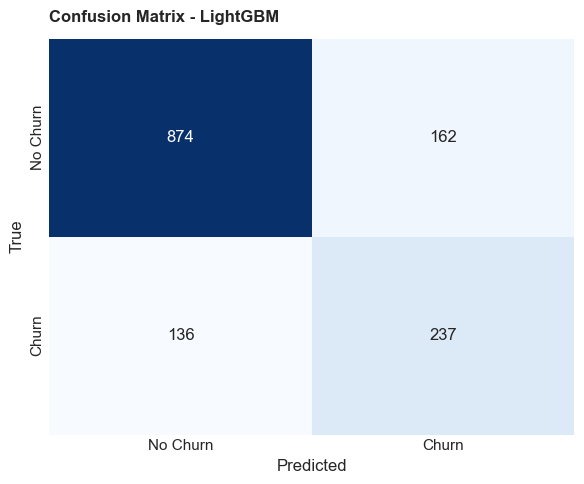


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1036
           1       0.55      0.61      0.58       373

    accuracy                           0.77      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.77      0.77      0.77      1409




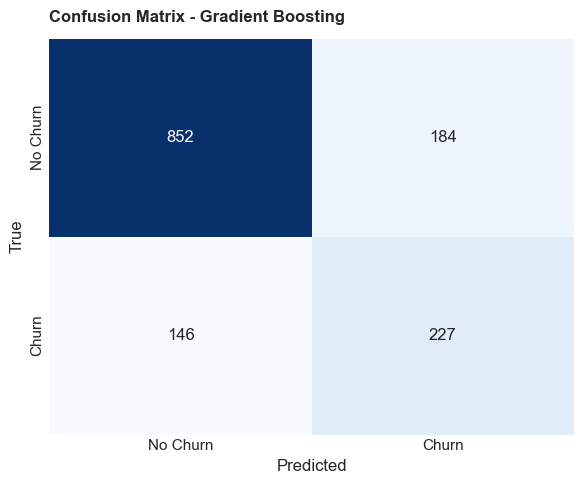

In [141]:
# Avaliando o desempenho dos modelos finais no conjunto de teste com hiperparâmetros
for clf_name, model in trained_hyper.items():
    print('---', clf_name, '---')
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print()

    # Calculando e exibindo a matriz de confusão como um gráfico
    cm = confusion_matrix(y_test, y_pred)
    f, ax = plt.subplots(figsize=(6, 5))
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {clf_name}', fontsize=12, loc='left', pad=12)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.xaxis.set_ticklabels(['No Churn', 'Churn'])  
    ax.yaxis.set_ticklabels(['No Churn', 'Churn'])
    plt.tight_layout()
    plt.show()
    print()

### Considerações Finais

Churn é uma preocupação para todas as empresas, e através da aplicação de modelos de Machine Learning, é possível reduzir essa taxa através da previsão de churn.

No âmbito deste estudo, optamos por utilizar a métrica de recall como base para o nosso modelo. O nosso objetivo foi maximizar a detecção de clientes que efetivamente cancelaram o serviço.

Dessa forma, conseguimos antecipar quais novos clientes podem cancelar o serviço e explorar estratégias para antecipar essas situações e, assim, contribuir para a retenção e fidelização dos clientes.

Com base nos resultados dos testes realizados, ficou evidente que o modelo que se destacou foi o LightGBM.
Este modelo apresentou os seguintes resultados:
* 237 previsões corretas de churn;
* 136 previsões incorretas de clientes que não cancelaram (falsos negativos);
* 162 previsões incorretas de clientes que cancelaram (falsos positivos).

As próximas etapas e melhorias para este projeto incluiriam a otimização dos hiperparâmetros, visando alcançar resultados finais ainda mais aprimorados para os modelos.

É importante salientar que este projeto tem espaço para melhorias e estou aberto a sugestões e colaborações para aprimorá-lo ainda mais.